We depend on this sync_lib library that is one folder above

In [1]:
import sys
sys.path.append('../')

In [2]:
from sync_lib import Dataset
import matplotlib.pylab as plt
import numpy as np

Path to relevant sync file

In [3]:
path = "2021T134531.h5"


In [4]:
dset = Dataset(path)

/Users/jeromel/anaconda2/envs/deep_work/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


Here we plot the period of stimulus rendering, driving photo-diode and photo-diode response time after screen flipping

(0, 2)

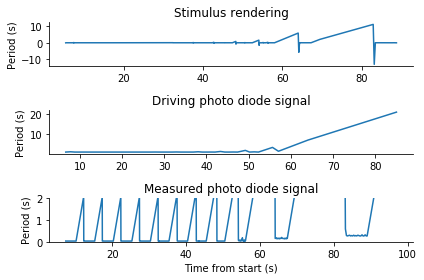

In [27]:

# This is the fastest output from bonsai to digital line
times_bonsai_fast_sync = dset.get_rising_edges('vsync_stim', units='sec')

# This is the driving signal behind the photodiode
times_bonsai_driving_photodiode = dset.get_rising_edges(
    'stim_running', units='sec')

times_photodiode = dset.get_rising_edges('stim_photodiode', units='sec')

plt.subplot(3, 1, 1)
plt.plot(times_bonsai_fast_sync[2:], np.diff(np.diff(times_bonsai_fast_sync)))
plt.ylabel('Period (s)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('Stimulus rendering')

plt.subplot(3, 1, 2)
plt.plot(times_bonsai_driving_photodiode[1:], np.diff(
    times_bonsai_driving_photodiode))
plt.ylabel('Period (s)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('Driving photo diode signal')

plt.subplot(3, 1, 3)
y_axis_data = np.diff(
    times_photodiode)
plt.plot(times_photodiode[1:], y_axis_data)
plt.xlabel('Time from start (s)')
plt.ylabel('Period (s)')
plt.title('Measured photo diode signal')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig('go_no_go_hardware_2021T12950_sync_lines.png')
plt.ylim([0,2])


We want to replicate the plot from BonVisin paper on Frames/second vs Number of elements. For this we need to extract each different section of the grid array stim

In [36]:
times_photodiode.shape[0]

854

This is coming from the bonsai workflow

In [41]:
grid_size = np.array([1,2,3,4,6,8,12,16,24,32,48,64])
nb_flips_per_grid = 24

ipykernel_launcher:6: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


Text(0, 0.5, 'Frames / second')

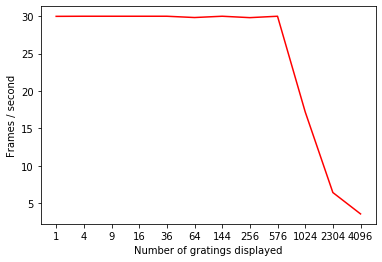

In [82]:
list_periods = []
local_list = []
previous_time = []

for index, local_time in enumerate(times_photodiode):
    if not(previous_time==[]):
        local_period = local_time-previous_time

        if local_period<2:
            local_list.append(local_period)
            previous_time = local_time
        else:            
            list_periods.append(np.mean(local_list))
            local_list = []
            previous_time = []
    else:
        previous_time = local_time

plt.plot([str(x**2) for x in grid_size], 1/np.array(list_periods), 'r')
plt.xlabel('Number of gratings displayed')
plt.ylabel('Frames / second')

In [76]:
np.diff(times_photodiode)>2.0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [77]:
np.diff(times_photodiode)

array([ 0.03465,  0.03329,  0.03334,  0.03334,  0.03335,  0.03331,
        0.03334,  0.03331,  0.03335,  0.03333,  0.03334,  0.03332,
        0.03335,  0.03332,  0.03333,  0.03335,  0.03334,  0.03331,
        0.03334,  0.03333,  0.03332,  0.03332,  0.03337,  0.03332,
        0.03331,  0.03334,  0.03334,  0.03332,  0.03335,  0.03334,
        0.03334,  0.03332,  0.03333,  0.03333,  0.03332,  0.03337,
        0.03329,  0.03335,  0.03335,  0.03331,  0.03333,  0.03333,
        0.03335,  0.03334,  0.03331,  0.03334,  0.03334,  0.03332,
        0.03336,  0.03334,  0.03331,  0.03333,  0.03334,  0.03333,
        0.03334,  0.03333,  0.03333,  0.03333,  0.03334,  0.03332,
        0.03332,  0.03336,  0.03335,  0.03332,  0.03332,  0.03334,
        0.03332,  0.03334,  0.03333,  0.03332,  0.03334,  0.03335,
        0.03329,  0.03337,  0.03332,  0.03336,  0.0333 ,  0.03335,
        0.03333,  0.03332,  0.03333,  0.03333,  0.03335,  0.03334,
        0.03333,  2.04871,  0.03463,  0.03325,  0.03339,  0.03